# Q1: Write your own LCG random generator with the following set of parameters

- a = 1103515245
- c = 12345
- m = 32768.


In [1]:
from library.myrandom import Random
# Please go into the file random.py inside the folder
# library to see the implementation of the LCG algorithm.
r = Random(seed=0.1)  # making the random instance with the seed value
print(r.LCG())  # Showing how to use the LCG function
print(r.LCG())  # Doing 3 times to show the result
print(r.LCG())

0.0380096435546875
0.4963531494140625
0.6589202880859375


### Link to specific relevant functions used here:

- [LCG function](library/random.py#L18-L33)

This will take you to the library files.


# Q2: Calculate the volume of that part of a sphere of unit radius, centered at origin,which is in the First quadrant by throwing method.

### Link to specific relevant functions used here:

- [distance function](library/basic_arithmatic.py#L28-L44)


In [2]:
from library.basic_arithmatic import distance
from tqdm import tqdm  # Just helps us get a progress bar for loops
from math import pi  # Used for comparizon purposes only


In [3]:
N = 10**6
r = Random(0.74)  # seed = 0.74

inside = 0
for i in tqdm(range(N)):
    # Generate a random point on the 3D space
    point = [r.LCG() for i in range(3)]
    if distance(point, [0]*len(point)) < 1:
        inside += 1

print(
    f"volume = {inside/N} units, which is almost equal to pi/6 (={round(pi/6, 6)})")

# value of this should come close to 6
print(f"pi/volume = {pi*N/inside} (almost equal to 6)")


100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:07<00:00, 132558.00it/s]

volume = 0.52347 units, which is almost equal to pi/6 (=0.523599)
pi/volume = 6.001476022675211 (almost equal to 6)


# Q3: Random Walk

### Link to specific relevant functions used here:

- [random_walk function](library/random.py#L35-L84)
- [RMS function](library/basic_arithmatic.py#L46-L56)


In [4]:
from library.basic_arithmatic import RMS
from tqdm import tqdm  # Just helps us get a progress bar for loops


100%|█████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 73519.79it/s]


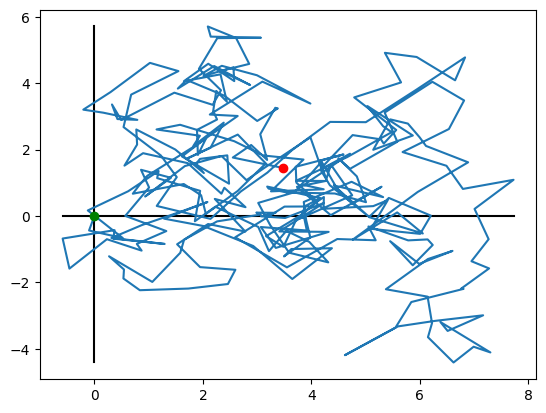

In [5]:
# r = Random(seed=0.5)  # making a new random instance with a new seed value
r = Random(seed=0.108)  # making a new random instance with a new seed value
points, dist = r.walk(steps=300)

100%|████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 186027.68it/s]


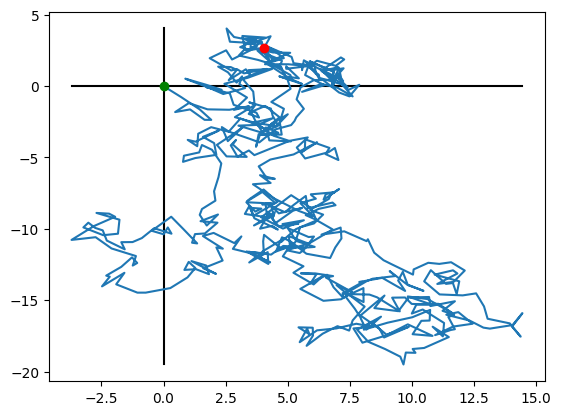

In [6]:
r = Random(seed=0.45)  # making a new random instance with a new seed value
points, dist = r.walk(steps=600)


100%|████████████████████████████████████████████████████████████████████████████| 900/900 [00:00<00:00, 287960.45it/s]


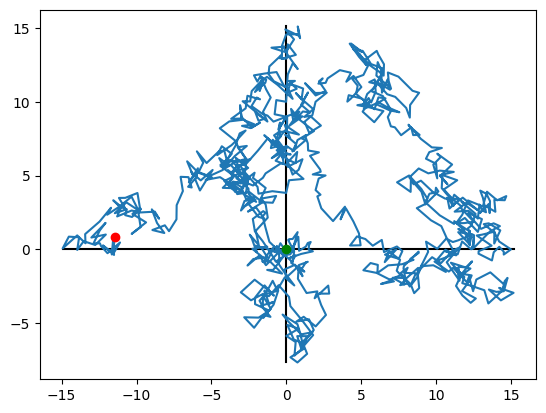

In [7]:
r = Random(seed=0.4)  # making a new random instance with a new seed value
points, dist = r.walk(steps=900)


In [8]:
N = 10**4
RMS_dist = 0
disp = 0
steps = 900  # Change this for walks of different steps
for i in tqdm(range(N)):
    r = Random(seed=i/N)  # making a new random instance with a new seed value
    points, dist = r.walk(
        steps=steps,
        plot=False
    )
    RMS_dist += RMS(dist)

    disp += distance(points[-1], [0]*len(points[-1]))/steps

mean_RMS_dist = RMS_dist/N
mean_disp = disp/N

print(mean_RMS_dist/mean_disp)


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:04<00:00, 156.24it/s]

32.717608945489964


In [9]:
print(mean_RMS_dist/(mean_disp*steps**0.5))


1.0905869648496653


# Making GIF

### At this point, the assignment is probably complete. But I wanted to plot the data, animate it and see if it is a good representation of the random walk

Click on this link to view the GIF Created with the following code: [random_walk.gif](random_walk.gif)


100%|████████████████████████████████████████████████████████████████████████████████| 202/202 [00:06<00:00, 30.02it/s]


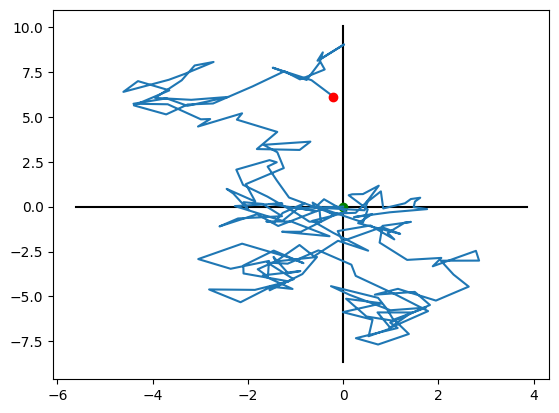

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from library.myrandom import Random
from tqdm import tqdm
r = Random(seed=0.4)
points, dist = r.walk(steps=200, plot=False)
pointsx, pointsy = zip(*points)


fig = plt.figure()
# Axes
extra = 1
plt.plot([max(pointsx)+extra, min(pointsx)-extra], [0, 0], '#000000')  # x-axis
plt.plot([0, 0], [max(pointsy)+extra, min(pointsy)-extra], '#000000')  # y-axis

plt.plot(pointsx[0], pointsy[0], "go")  # starting point
l, = plt.plot([], [])

metadata = dict(title='Movie', artist='PeithonKing')
writer = PillowWriter(fps=20, metadata=metadata)

with writer.saving(fig, "random_walk.gif", 100):

    # updating the different frames
    for i in tqdm(range(len(points)+1)):
        l.set_data(pointsx[:i], pointsy[:i])
        writer.grab_frame()

    # add the last point
    plt.plot(pointsx[-1], pointsy[-1], "ro")

    # Adding delay at the end of the gif
    for i in range(20):
        writer.grab_frame()
